In [1]:
import pandas as pd
df= pd.read_csv("NEW_Keywords_college.csv")
df

,index,selftext,num_comments,score,title,type
0,18,(I work minimum wage and will be in college),1,1,"All right, so I got a few questions...",Adult
1,42,I need to know what I should do when I'm eight...,7,1,"I need help when I'm eighteen (""running away"")",Adult
2,44,When I was 18-21 I struggled a lot - I was a b...,2,1,25F List of 5 Key Apps to Help You Adult More ...,Adult
3,53,I was out of a job in Indiana and could never ...,5,1,Moved out for the first time,Adult
4,60,It will be slightly focused on college and pos...,4,9,I'm starting a mental health/adulting blog!,Adult
...,...,...,...,...,...,...
3264,5945,It's been a year since I moved out of my paren...,13,1,1 year since I moved out of parents! 🥳,Adult
3265,5999,"I'm a well educated person, speaking four lang...",0,1,Should I change my job? I feel like burning ou...,Adult
3266,6020,First year of college is stressful af and the ...,0,1,I want to be 16 again :(,Adult
3267,6022,I was just told that I'd have to go back to co...,3,1,I have to leave my boyfriend in about 2 weeks ...,Adult


In [2]:
import re
def remove_other(x):
    x = re.sub("\$"," ", x) #remove $
    x = re.sub("https*\S+", " ", x) #remove url
    #x = re.sub("\'\w+", '', x) #remove i'm,we're,let's after the '
    #x = re.sub("[0-9]+", '', x) #remove numbers
    x = x.encode('ascii', 'ignore').decode()
    return x

In [3]:
from nltk.stem import WordNetLemmatizer
def lemmatize(words):
    lemmatizer = WordNetLemmatizer()
    nwords=[]
    for word in words:
        word=lemmatizer.lemmatize(word)
        nwords.append(word)
    return ' '.join(nwords)

In [4]:
df['selftext']=df['selftext'].apply(lambda x: remove_other(x))
df['selftext']= df['selftext'].str.split().apply(lambda x: lemmatize(x))
df['selftext']

0            (I work minimum wage and will be in college)
1       I need to know what I should do when I'm eight...
2       When I wa 18-21 I struggled a lot - I wa a bro...
3       I wa out of a job in Indiana and could never f...
4       It will be slightly focused on college and pos...
                              ...                        
3264    It's been a year since I moved out of my paren...
3265    I'm a well educated person, speaking four lang...
3266    First year of college is stressful af and the ...
3267    I wa just told that I'd have to go back to col...
3268    Im 22 year old, just graduated college 2 month...
Name: selftext, Length: 3269, dtype: object

In [5]:
X=pd.DataFrame({'text':df['selftext']})
X = X.dropna().reset_index()
X

,index,text
0,0,(I work minimum wage and will be in college)
1,1,I need to know what I should do when I'm eight...
2,2,When I wa 18-21 I struggled a lot - I wa a bro...
3,3,I wa out of a job in Indiana and could never f...
4,4,It will be slightly focused on college and pos...
...,...,...
3264,3264,It's been a year since I moved out of my paren...
3265,3265,"I'm a well educated person, speaking four lang..."
3266,3266,First year of college is stressful af and the ...
3267,3267,I wa just told that I'd have to go back to col...


In [6]:
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#analyzer=‘char_wb’
vec=TfidfVectorizer(min_df=0.01,stop_words='english',ngram_range=(1,2))
counts=vec.fit_transform(X['text'])
counts=counts.toarray()
count_df1=pd.DataFrame(counts,columns=vec.get_feature_names())
count_df1=count_df1.drop(['amp','don'],axis=1)
count_df1

,000,10,18,19,20,20 year,2019,2020,2021,21,...,working time,world,worth,x200b,year,year ago,year college,year old,years,young
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.289995,0.0,0.0,0.0,0.0,0.0,0.0,0.301887,...,0.349768,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.370953,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3264,0.0,0.0,0.169650,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.179078,0.0,0.000000,0.146447,0.0,0.0
3265,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.368264,0.0,0.000000,0.000000,0.0,0.0
3266,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.289505,0.0,0.462136,0.000000,0.0,0.0
3267,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0


In [7]:
from sklearn.decomposition import NMF

model1=NMF(n_components=3,init="random",random_state=0)
model1.fit(count_df1)
#model1.components_

NMF(init='random', n_components=3, random_state=0)

In [8]:
import numpy as np
def top_words(X, model, component, num_words):
    """
    Extract the top words from the specified component 
    for a topic model trained on data. 
    X: a term-document matrix, assumed to be a pd.DataFrame
    model: a sklearn model with a components_ attribute, e.g. NMF
    component: the desired component, specified as an integer. 
        Must be less than than the total number of components in model
    num_words: the number of words to return.
    """
    orders = np.argsort(model.components_, axis = 1)
    important_words = np.array(X.columns)[orders]
    return important_words[component][-num_words:]

In [9]:
topic1=pd.DataFrame({'Topic 0':top_words(count_df1, model1, 0, 10),
                   'Topic 1':top_words(count_df1, model1, 1, 10),
                   'Topic 2':top_words(count_df1, model1, 2, 10),})
topic1

,Topic 0,Topic 1,Topic 2
0,currently,old,money
1,old college,recently graduated,like
2,im college,college,going
3,year old,recently,time
4,year,job,job
5,old,year,school
6,college,just graduated,im
7,im,just,year
8,college student,graduated college,wa
9,student,graduated,college


Topic 0: current college student \
Topic 1: recently graduated college student \
Topic 2: money/job/school

In [10]:
W=model1.fit_transform(count_df1)
L=[]
for i in W:
    L.append(i.argmax())
X['topic']=L
t0=X[X.topic==0]
t1=X[X.topic==1]
t2=X[X.topic==2]

## Compare Emotion across topics

In [11]:
def sent_df(df):
    from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
    import my_module
    import importlib
    importlib.reload(my_module)

    #create a list of dictionaries
    sia = SIA()
    results = []
    words=[]

    for line in df['text']:
        D,pol_score=my_module.polarity_scores(sia,text=line) #use customized module
        pol_score['text'] = line
        results.append(pol_score)
        words.append(D)
    #Extract sentiment words
    D_p=[] # positive word and its sentiment score
    D_n=[] # negative word and its sentiment score
    D1=[] # only positive word
    D2=[] # only negative word
    for i in range(len(words)):
        newDict = {key: value for (key, value) in words[i].items() if value != 0.0 }
        newDict1 = {key: value for (key, value) in words[i].items() if value > 0.0 }
        newDict2 = {key: value for (key, value) in words[i].items() if value < 0.0 }
        D_p.append(newDict1)
        D_n.append(newDict2)
        D1.append(list(newDict1.keys()))
        D2.append(list(newDict2.keys()))
    #create a df to write in the results of sentiment analysis
    sent = pd.DataFrame(results)
    sent['p_word_dict']=D_p
    sent['n_word_dict']=D_n
    p=[]
    n=[]
    for i in D1:
        p.append(' '.join(i))
    for i in D2:
        n.append(' '.join(i))
    sent['total']=(sent.pos-sent.neg)/sent.neu    
    sent['p_word']=p
    sent['n_word']=n
    sent['label']=0
    sent['label'].loc[sent['total']> 0]=1
    sent['label'].loc[sent['total']< 0]=-1
    return sent

In [12]:
a=sent_df(t0)
a['topic']=0

b=sent_df(t1)
b['topic']=1

c=sent_df(t2)
c['topic']=2


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [13]:
final=pd.concat([a,b,c],axis=0)
final.total.describe()

count    3268.000000
mean        0.038682
std         0.195354
min        -4.714286
25%        -0.000268
50%         0.000000
75%         0.121076
max         1.898551
Name: total, dtype: float64

[Text(0, 0.5, 'Sentiment Score'), Text(0.5, 1.0, 'Sentiment Score by topics')]

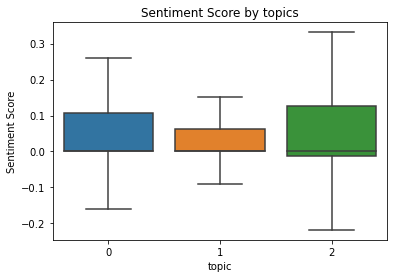

In [14]:
import seaborn as sns
ax = sns.boxplot(x="topic", y="total", data=final,showfliers = False)
ax.set(ylabel="Sentiment Score",title="Sentiment Score by topics")

## Most common positive/negative words

In [15]:
def sort_pn(df):
    positive=df.p_word[df['label']==1] #positive words in positive post
    negative=df.n_word[df['label']==-1] #negative words in negative post
    return positive,negative

In [16]:
import itertools
import collections
def count_words(text):
    all_words = list(itertools.chain(*text.str.split()))
    counts = collections.Counter(all_words)
    counts_df = pd.DataFrame(counts.most_common(100),
                            columns=['words', 'count'])

    return counts_df

In [17]:
positive,negative=sort_pn(final)
p_n=pd.concat([count_words(positive)[:5],count_words(negative)[:5]])
p_n

,words,count
0,like,251
1,want,172
2,credit,142
3,ha,136
4,good,134
0,no,144
1,pay,134
2,debt,111
3,want,39
4,sure,32


In [18]:
positive,negative=sort_pn(a)
p_n=pd.concat([count_words(positive)[:5],count_words(negative)[:5]])
p_n

,words,count
0,credit,47
1,ha,25
2,like,18
3,good,15
4,best,12
0,no,25
1,debt,20
2,pay,16
3,broke,6
4,bad,3


In [19]:
positive,negative=sort_pn(b)
p_n=pd.concat([count_words(positive)[:5],count_words(negative)[:5]])
p_n

,words,count
0,friend,7
1,credit,7
2,good,7
3,like,6
4,fortunate,5
0,debt,17
1,no,11
2,pay,7
3,sure,3
4,shit,3


In [20]:
positive,negative=sort_pn(c)
p_n=pd.concat([count_words(positive)[:5],count_words(negative)[:5]])
p_n

,words,count
0,like,227
1,want,157
2,good,112
3,friend,108
4,ha,106
0,pay,111
1,no,108
2,debt,74
3,want,36
4,sure,26


## Word Frequency splitted by sentiment

In [21]:
from nltk.corpus import stopwords
#nltk.download("stopwords") #uncomment it when run it for the first time
stop_words = set(stopwords.words("english"))

stop_words.update({'would','k','im','could','also',
                   'amp','much','one','like','get',
                   'since','etc','got','always',
                   'know','thing','really','dont',
                   'find','even','go','time','need','want'
                  })
def remove_stopwords(text):
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

final['text']=final['text'].apply(lambda x: remove_stopwords(x))

In [22]:
from nltk.util import ngrams
def count_2gram(text):
    all_words = list(itertools.chain(*text.str.split()))
    es2grams = ngrams(all_words, 2)
    counts = collections.Counter(es2grams)
    count_df = pd.DataFrame(counts.most_common(100),
                            columns=['words', 'count'])
    dictionary2 = [' '.join(tup) for tup in count_df.words]
    count_df.words=dictionary2

    return count_df

In [23]:
final.total.describe()

count    3268.000000
mean        0.038682
std         0.195354
min        -4.714286
25%        -0.000268
50%         0.000000
75%         0.121076
max         1.898551
Name: total, dtype: float64

In [25]:
def pn_freq(df):
    count_p=count_2gram(df['text'][df['label']>0.121076]) #>0.109797 #==1
    count_n=count_2gram(df['text'][df['label']<-0.000268]) #<-0.001208 #==-1
    return count_p,count_n

p,n=pn_freq(final)
p.head(10),n.head(10)

(               words  count
 0               I wa    182
 1    college student    147
 2          college I    115
 3  community college     82
 4         college, I     67
 5        high school     65
 6           year old     62
 7         college. I     60
 8             I feel     60
 9          I college     59,
                words  count
 0               I wa    113
 1          college I     66
 2    college student     60
 3       year college     38
 4          I college     36
 5         college. I     35
 6             I feel     35
 7        high school     35
 8  graduated college     34
 9  community college     32)

In [26]:
p,n=pn_freq(final[final.topic==0])
p.head(10),n.head(10)

(              words  count
 0   college student    131
 1          year old     36
 2         I college     24
 3       credit card     24
 4      student loan     24
 5              I wa     19
 6       old college     18
 7  college student,     17
 8         student I     16
 9       I currently     16,
               words  count
 0   college student     54
 1          year old     14
 2  college student,     10
 3       old college      8
 4        Im college      8
 5      student loan      8
 6       I'm college      7
 7         I college      7
 8  college student.      7
 9              I wa      6)

In [27]:
p,n=pn_freq(final[final.topic==1])
p.head(10),n.head(10)

(                words  count
 0   graduated college     49
 1         I graduated     40
 2  recently graduated      9
 3                I wa      9
 4  graduated college,      7
 5        student loan      7
 6          college. I      6
 7            year old      6
 8  graduated college.      5
 9           I started      5,
                 words  count
 0   graduated college     34
 1         I graduated     25
 2            year ago      8
 3            year old      7
 4  graduated college,      7
 5         high school      4
 6          college. I      4
 7  recently graduated      4
 8        college year      4
 9                I wa      4)

In [28]:
p,n=pn_freq(final[final.topic==2])
p.head(10),n.head(10)

(               words  count
 0               I wa    154
 1          college I    104
 2  community college     80
 3        high school     62
 4         college, I     60
 5             I feel     57
 6         college. I     48
 7       year college     45
 8            I think     39
 9          I college     34,
                words  count
 0               I wa    103
 1          college I     63
 2       year college     35
 3        high school     30
 4             I feel     30
 5  community college     29
 6         college. I     27
 7          I college     27
 8         college, I     26
 9              I pay     24)

## Topic Modeling after sentiment splitting

In [29]:
final.total.describe()

count    3268.000000
mean        0.038682
std         0.195354
min        -4.714286
25%        -0.000268
50%         0.000000
75%         0.121076
max         1.898551
Name: total, dtype: float64

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer(min_df=0.01,stop_words='english',ngram_range=(1,2))
counts=vec.fit_transform(final['text'][final['label']>0.121076]) #positive
counts=counts.toarray()
count_df1=pd.DataFrame(counts,columns=vec.get_feature_names())
#count_df1=count_df1.drop(['amp','don'],axis=1)
count_df1

,000,10,100,1000,10k,15,18,19,20,20 year,...,working time,world,worth,x200b,year,year ago,year college,year old,years,young
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.098118,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1458,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1459,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1460,0.0,0.0,0.0,0.0,0.0,0.0,0.190737,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [31]:
from sklearn.decomposition import NMF

model1=NMF(n_components=2,init="random",random_state=1)
model1.fit(count_df1)

NMF(init='random', n_components=2, random_state=1)

In [32]:
topic2=pd.DataFrame({'Topic 0':top_words(count_df1, model1, 0, 10),
                   'Topic 1':top_words(count_df1, model1, 1, 10)})
topic2
# 'Topic 4':top_words(count_df1, model1, 4, 10),
#                     'Topic 5':top_words(count_df1, model1, 5, 10)

,Topic 0,Topic 1
0,im college,work
1,currently,friend
2,loan,im
3,im,going
4,college,money
5,credit card,school
6,card,job
7,credit,wa
8,college student,year
9,student,college


pay house/loan/car \
retirement \
credit card \
school friend feel

In [33]:
vec=TfidfVectorizer(min_df=0.01,stop_words='english',ngram_range=(1,2))
counts=vec.fit_transform(final['text'][final['label']<-0.000268]) #negative
counts=counts.toarray()
count_df2=pd.DataFrame(counts,columns=vec.get_feature_names())
#count_df1=count_df1.drop(['amp','don'],axis=1)
count_df2

,000,10,100,18,19,20,2020,2021,21,22,...,working,world,worried,x200b,year,year ago,year college,year old,years,young
0,0.0,0.0,0.0,0.274593,0.0,0.000000,0.0,0.0,0.272448,0.0,...,0.242708,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.264304,0.0,...,0.000000,0.0,0.0,0.0,0.142278,0.0,0.000000,0.249793,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.384151,0.0,...,0.000000,0.0,0.0,0.0,0.206793,0.0,0.000000,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.299309,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
812,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
813,0.0,0.0,0.0,0.000000,0.0,0.502011,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
814,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
815,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.304311,0.0,0.467895,0.000000,0.0,0.0


In [34]:
model2=NMF(n_components=2,init="random",random_state=0)
model2.fit(count_df2)

NMF(init='random', n_components=2, random_state=0)

In [35]:
topic3=pd.DataFrame({'Topic 0':top_words(count_df2, model2, 0, 10),
                   'Topic 1':top_words(count_df2, model2, 1, 10)})
topic3

,Topic 0,Topic 1
0,income,work
1,loan,debt
2,im college,pay
3,pay,going
4,currently,school
5,debt,im
6,college,job
7,im,year
8,college student,wa
9,student,college


live home/parent \
credit card and insurance \
retirement \
parent talking

## Find all adj. related to parent

In [36]:
from nltk.tokenize import sent_tokenize
#nltk.download('punkt')
sentence=df['selftext'].apply(lambda x: sent_tokenize(x))

In [37]:
def extract_parent(sentence_ele):
    L=[]
    for i in sentence_ele:
        if 'college' in i: 
            L.append(i)
    return L

In [38]:
parent_sentence=sentence.apply(lambda x: extract_parent(x))
' '.join(parent_sentence[0])

'(I work minimum wage and will be in college)'

In [39]:
parent_sentence[0]

['(I work minimum wage and will be in college)']

In [45]:
import nltk
tokens=nltk.word_tokenize(parent_sentence[0][0])
print(tokens)

['(', 'I', 'work', 'minimum', 'wage', 'and', 'will', 'be', 'in', 'college', ')']


In [46]:
import nltk
nltk.pos_tag(tokens)

[('(', '('),
 ('I', 'PRP'),
 ('work', 'VBP'),
 ('minimum', 'JJ'),
 ('wage', 'NN'),
 ('and', 'CC'),
 ('will', 'MD'),
 ('be', 'VB'),
 ('in', 'IN'),
 ('college', 'NN'),
 (')', ')')]

In [47]:
#nltk.download('averaged_perceptron_tagger')
def extract_adj(sentence_ele):
    adjs=[]
    for i in sentence_ele:
        tokens=nltk.word_tokenize(i)
        df_type=pd.DataFrame(nltk.pos_tag(tokens),columns=['words', 'type'])
        adjs=list(df_type[df_type.type=='JJ'].words)
    return ' '.join(adjs)

In [48]:
adjs=parent_sentence.apply(lambda x: extract_adj(x))

In [49]:
adjs

0                                                 minimum
1       eighteen medical much eighteen high stable pos...
2                                        18-21 mental bad
3                                                        
4                            mental important mental real
                              ...                        
3264    rid negative great independent lot.I healthy h...
3265    commercial graphic last college/high grade dem...
3266                            First stressful bad laggy
3267                          early first long good first
3268                                                  old
Name: selftext, Length: 3269, dtype: object

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer(max_df=0.5,min_df=0.01,stop_words='english',ngram_range=(1,2))
counts=vec.fit_transform(adjs)
counts=counts.toarray()
count_df1=pd.DataFrame(counts,columns=vec.get_feature_names())
#count_df1=count_df1.drop(['amp','don'],axis=1)
count_df1

,able,big,current,decent,different,financial,free,good,great,high,...,new,old,online,real,recent,second,senior,sure,time,young
0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.612539,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,...,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3264,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.817323,0.000000,...,0.0,0.576179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3265,0.73662,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.676307,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3266,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3267,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.61347,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
from sklearn.decomposition import NMF

model1=NMF(n_components=3,init="random",random_state=0)
model1.fit(count_df1)

NMF(init='random', n_components=3, random_state=0)

In [52]:
topic1=pd.DataFrame({'Topic 0':top_words(count_df1, model1, 0, 10),
                   'Topic 1':top_words(count_df1, model1, 1, 10),
                   'Topic 2':top_words(count_df1, model1, 2, 10)})
topic1

,Topic 0,Topic 1,Topic 2
0,great,real,able
1,long,free,little
2,young,young,decent
3,little,different,real
4,sure,sure,free
5,recent,little,medical
6,financial,financial,second
7,able,able,time
8,new,senior,recent
9,good,high,old


In [53]:
# List of all words across rows
import itertools
import collections
def count_words(text):
    all_words = list(itertools.chain(*text.str.split()))
    counts = collections.Counter(all_words)
    counts_df = pd.DataFrame(counts.most_common(100),
                            columns=['words', 'count'])

    return counts_df
count_words(adjs).head(20)

,words,count
0,first,220
1,old,191
2,good,143
3,new,125
4,high,124
5,full,117
6,few,111
7,last,108
8,other,105
9,next,103


In [54]:
stop_words.update({'i','*','im','’','much'})
adjs=adjs.apply(lambda x: remove_stopwords(x))
count_df=count_words(adjs)
count_df.head(10)

,words,count
0,first,220
1,old,191
2,good,143
3,new,125
4,high,124
5,full,117
6,last,108
7,next,103
8,able,81
9,financial,78
